## SQL Salary and Consumer Survey
by Wolfrank Guzman

In [109]:
import pandas as pd
import random
import faker
import seaborn as sns  
import matplotlib.pyplot as plt
import sqlite3




# Create a Faker instance to generate fake data
fake = faker.Faker()

# Define the number of rows in the DataFrame
num_rows = 200

# Initialize empty lists for each column
RecordID = [i for i in range(1, num_rows + 1)]

# List of random sexes
sexes = [random.choice(["Male", "Female"]) for _ in range(num_rows)]

# Generate random first names starting with a random letter based on sex
first_names = [fake.first_name_male() if sex == "Male" else fake.first_name_female() for sex in sexes]

last_names = [fake.last_name() for _ in range(num_rows)]

# List of email endings
email_endings = ["@gmail.com", "@yahoo.com", "@msn.com", "@comcast.net", "@fios.net", "@myspace.com", "@microsoft.net", "@lycos.net"]

# Generate random email addresses using first names
emails = [f"{first.lower()}{random.choice(email_endings)}" for first in first_names]

# Generate other random data
occupations = [random.choice(["Software Developer", "Nurse Practitioner","Software Developer", "Nurse Practitioner", "Electrician", "Marketing Manager", "Dental Hygienist", "Mechanical Engineer", "Social Worker", "Pharmacist", "Financial Analyst", "Physical Therapist", "Graphic Designer", "Veterinarian", "Chef", "Police Officer", "Architect", "Occupational Therapist", "Teacher", "Accountant", "Civil Engineer", "Psychologist", "Plumber", "Web Designer", "Pharmacist Technician", "Registered Nurse", "Lawyer", "Biomedical Engineer", "Librarian", "Human Resources Manager", "Dental Assistant", "Data Analyst", "Radiologic Technologist", "Construction Worker", "Artist", "Environmental Scientist", "Financial Advisor", "Physical Education Teacher", "Chef", "Firefighter", "IT Manager", "Medical Technologist", "Flight Attendant", "Geologist", "Sales Manager", "Speech-Language Pathologist", "Electrician", "Marketing Coordinator", "Physician", "Event Planner", "Economist", "Nurse", "Aerospace Engineer", "Social Media Manager", "Pharmacist", "Investment Banker", "Occupational Therapist", "Professor", "Accountant", "Civil Engineer", "Psychologist", "Plumber", "UX Designer", "Pharmacy Technician", "Registered Nurse", "Journalist", "Biomedical Scientist", "Librarian", "HR Specialist", "Dental Hygienist", "Biotechnologist", "Physical Therapist Assistant", "Police Officer", "Architect", "Elementary School Teacher", "Financial Planner", "Chef", "Game Developer", "Environmental Engineer", "Graphic Designer", "Pediatrician", "Marketing Analyst"]) for _ in range(num_rows)]
countries_of_birth = [fake.country() for _ in range(num_rows)]
salaries = [random.randint(45000, 385000) for _ in range(num_rows)]
education = [random.choice(['BA/BS', 'HS','Graduate','GED', 'Doctorate', 'Masters']) for _ in range(num_rows)]
age = [random.randint(22, 65) for _ in range(num_rows)]
years_of_experience = []
for a in age:
    if 22 <= a <= 30:
        years_of_experience.append(random.randint(0, 5))
    elif 30 < a <= 40:
        years_of_experience.append(random.randint(6, 10))
    elif 41 <= a <= 50:
        years_of_experience.append(random.randint(10, 18))
    else:
        years_of_experience.append(random.randint(18, 25))

avg_salary_occupation = [random.randint(30000, 220000) for _ in range(num_rows)]


# List of real U.S. state names
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
    "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma",
    "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont",
    "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Generate random states from the list of real U.S. state names
states = [random.choice(us_states) for _ in range(num_rows)]

# Create a DataFrame from the lists
df = pd.DataFrame({
    'RecordID': RecordID,
    'First Name': first_names,
    'Last Name': last_names,
    'Sex': sexes,
    'Age': age,
    'Occupation': occupations,
    'Country of Birth': countries_of_birth,
    'Salary': salaries,
    'Education': education,
    'Email': emails,
    'Years of Experience': years_of_experience,
    'Avg Salary for Occupation': avg_salary_occupation,
    'State': states,

})

# Display the first few rows of the DataFrame
display(df)


,RecordID,First Name,Last Name,Sex,Age,Occupation,Country of Birth,Salary,Education,Email,Years of Experience,Avg Salary for Occupation,State
0,1,Mary,Young,Female,24,Graphic Designer,Israel,109993,BA/BS,mary@myspace.com,1,138647,Iowa
1,2,Roberta,Mccormick,Female,43,Game Developer,Tanzania,120026,BA/BS,roberta@gmail.com,15,162345,Wyoming
2,3,Benjamin,Peterson,Male,49,Nurse Practitioner,Svalbard & Jan Mayen Islands,338792,Doctorate,benjamin@yahoo.com,10,138842,West Virginia
3,4,Kayla,Norris,Female,58,Architect,Andorra,293511,Doctorate,kayla@lycos.net,23,154203,Virginia
4,5,Cody,Singh,Male,37,Investment Banker,Gabon,88606,Doctorate,cody@lycos.net,8,95020,Indiana
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Raymond,Duarte,Male,44,Sales Manager,Saint Pierre and Miquelon,288119,GED,raymond@fios.net,11,167620,Wyoming
196,197,Carolyn,Robinson,Female,43,Social Media Manager,Gibraltar,132152,GED,carolyn@yahoo.com,10,94602,Wyoming
197,198,Yesenia,Santos,Female,58,Data Analyst,Taiwan,167805,Masters,yesenia@comcast.net,25,120138,Missouri
198,199,Aaron,Johnson,Male,29,Artist,Comoros,330364,Doctorate,aaron@comcast.net,4,138043,Missouri


In [110]:
import sqlite3

# Create and connect to a SQLite database
conn = sqlite3.connect('data.db')

# Create a DataFrame and store it in the database
df.to_sql('data', conn, if_exists='replace')

# Create a cursor for executing SQL queries
cursor = conn.cursor()


# 3. Select the average salary for all occupations
cursor.execute("SELECT AVG(Salary) FROM data")
average_salary = cursor.fetchone()[0]
print("\n3. Average Salary:", average_salary)



3. Average Salary: 211820.415


In [111]:


# 5. Select the records of individuals with salaries above $100,000
cursor.execute("SELECT * FROM data WHERE Salary > 200000")
results = cursor.fetchall()
print("\n5. Records of individuals with salaries above $200,000:")
for row in results:
    print(row)




5. Records of individuals with salaries above $200,000:
(2, 3, 'Benjamin', 'Peterson', 'Male', 49, 'Nurse Practitioner', 'Svalbard & Jan Mayen Islands', 338792, 'Doctorate', 'benjamin@yahoo.com', 10, 138842, 'West Virginia')
(3, 4, 'Kayla', 'Norris', 'Female', 58, 'Architect', 'Andorra', 293511, 'Doctorate', 'kayla@lycos.net', 23, 154203, 'Virginia')
(8, 9, 'Courtney', 'Noble', 'Female', 65, 'Biomedical Engineer', 'Mongolia', 252457, 'HS', 'courtney@fios.net', 22, 92394, 'Alabama')
(10, 11, 'Richard', 'Chandler', 'Male', 65, 'Physician', 'Gibraltar', 384462, 'HS', 'richard@comcast.net', 25, 93122, 'Washington')
(14, 15, 'Barbara', 'Krueger', 'Female', 52, 'Civil Engineer', 'Zambia', 348293, 'HS', 'barbara@lycos.net', 21, 117021, 'South Carolina')
(15, 16, 'James', 'Jones', 'Male', 44, 'Environmental Scientist', 'Papua New Guinea', 206774, 'Masters', 'james@yahoo.com', 10, 77109, 'Arkansas')
(16, 17, 'Angelica', 'Garrison', 'Female', 28, 'Biomedical Engineer', 'Malawi', 262645, 'Doctor

In [112]:

# 6. Select the youngest person's record
cursor.execute("SELECT * FROM data ORDER BY Age ASC LIMIT 1")
youngest_person = cursor.fetchone()
print("\n6. Youngest Person:", youngest_person)




6. Youngest Person: (64, 65, 'Kevin', 'Wood', 'Male', 22, 'Plumber', 'Palau', 48606, 'Graduate', 'kevin@comcast.net', 3, 189422, 'Alaska')


In [113]:


# 7. Select the occupations and their average salaries
cursor.execute("SELECT Occupation, AVG(Salary) FROM data GROUP BY Occupation")
results = cursor.fetchall()
print("\n7. Average salary for each occupation:")
for row in results:
    print(row)
    



7. Average salary for each occupation:
('Accountant', 137548.14285714287)
('Aerospace Engineer', 238300.5)
('Architect', 181596.8)
('Artist', 272056.0)
('Biomedical Engineer', 212446.66666666666)
('Biomedical Scientist', 232989.33333333334)
('Biotechnologist', 160432.0)
('Chef', 233649.33333333334)
('Civil Engineer', 249480.5)
('Construction Worker', 217074.5)
('Data Analyst', 187591.33333333334)
('Dental Assistant', 143800.0)
('Dental Hygienist', 175692.5)
('Economist', 227416.5)
('Electrician', 297657.0)
('Elementary School Teacher', 192546.75)
('Environmental Engineer', 255401.5)
('Environmental Scientist', 198792.25)
('Event Planner', 301406.0)
('Financial Advisor', 117143.0)
('Financial Planner', 323418.0)
('Firefighter', 132804.5)
('Flight Attendant', 79190.0)
('Game Developer', 202139.33333333334)
('Geologist', 305862.0)
('Graphic Designer', 140896.33333333334)
('HR Specialist', 151864.0)
('Human Resources Manager', 61269.0)
('IT Manager', 360298.0)
('Investment Banker', 143628

In [114]:


# 8. Count the number of people in each age group
cursor.execute("SELECT CASE \
                 WHEN Age BETWEEN 22 AND 30 THEN '22-30' \
                 WHEN Age BETWEEN 31 AND 40 THEN '31-40' \
                 WHEN Age BETWEEN 41 AND 50 THEN '41-50' \
                 ELSE '51 and over' \
               END AS Age_Group, COUNT(*) \
               FROM data GROUP BY Age_Group")
results = cursor.fetchall()
print("\n8. Count of people in each age group:")
for row in results:
    print(row)




8. Count of people in each age group:
('22-30', 42)
('31-40', 38)
('41-50', 41)
('51 and over', 79)


In [115]:



# 9. Select the highest salary and the corresponding occupation
cursor.execute("SELECT Occupation, MAX(Salary) FROM data")
result = cursor.fetchone()
print("\n9. Occupation with Highest Salary:", result)




9. Occupation with Highest Salary: ('Occupational Therapist', 384578)


In [116]:


# Close the database connection
#conn.close()


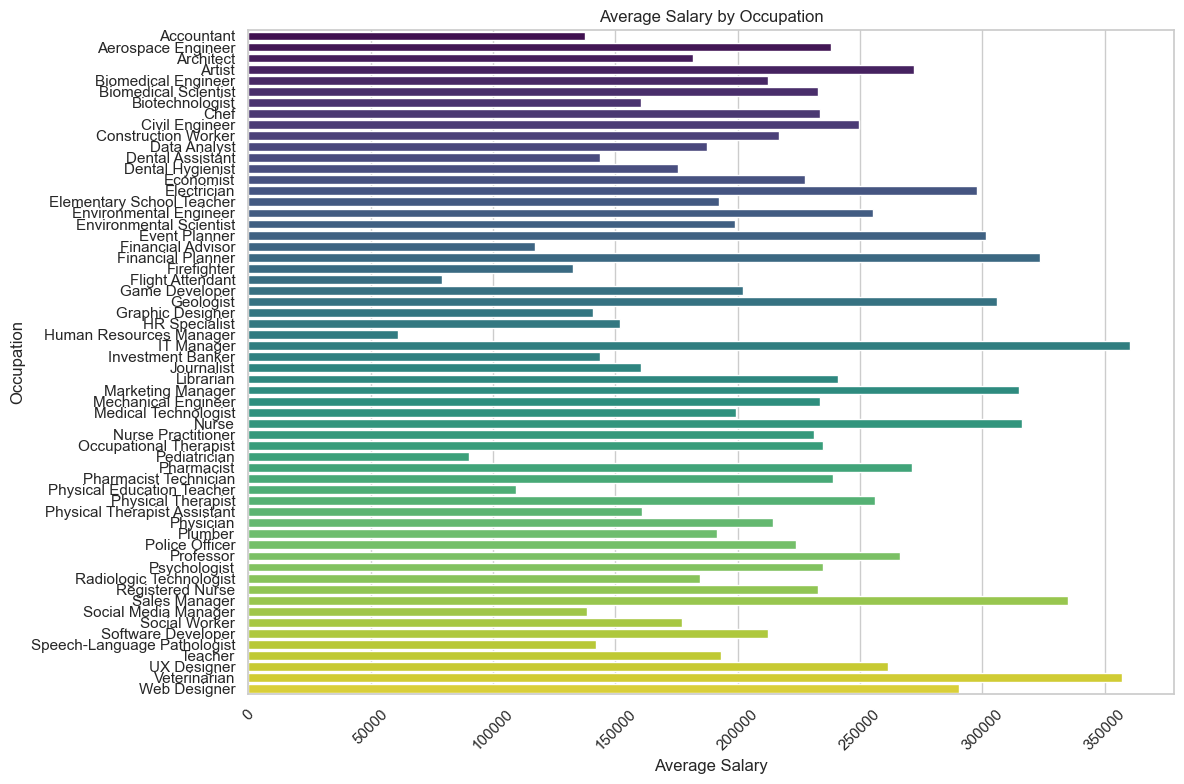

In [117]:
# Create a SQLite database connection


# Execute the SQL query to select occupations and their average salaries
cursor.execute("SELECT Occupation, AVG(Salary) FROM data GROUP BY Occupation")
results = cursor.fetchall()

# Convert the query results into a DataFrame
df = pd.DataFrame(results, columns=['Occupation', 'Average Salary'])

# Close the database connection
#conn.close()

# Create a Seaborn barplot to visualize the average salaries for each occupation
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x='Average Salary', y='Occupation', data=df, palette='viridis')
plt.title('Average Salary by Occupation')
plt.xlabel('Average Salary')
plt.ylabel('Occupation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


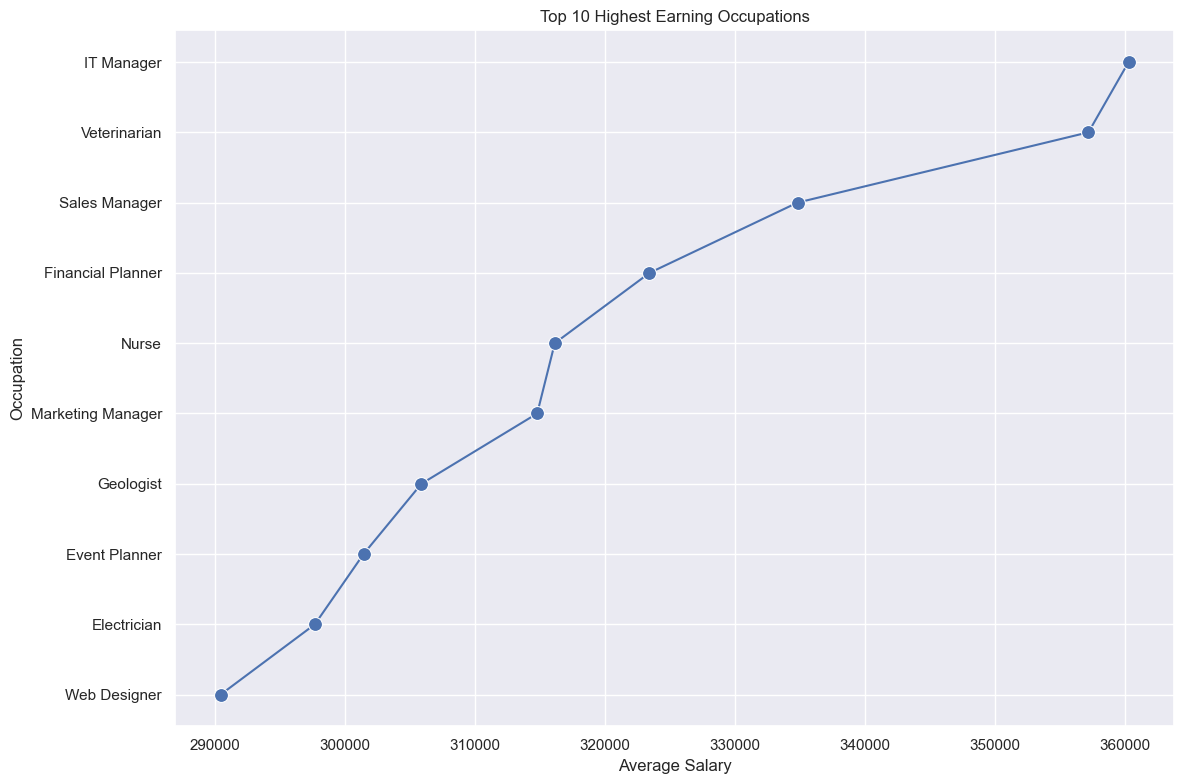

In [118]:
# Execute the SQL query to select the top 10 highest earning occupations
cursor.execute("SELECT Occupation, AVG(Salary) AS AvgSalary FROM data GROUP BY Occupation ORDER BY AvgSalary DESC LIMIT 10")
results = cursor.fetchall()

# Convert the query results into a DataFrame
df = pd.DataFrame(results, columns=['Occupation', 'Average Salary'])



# Create a Seaborn line chart to visualize the salaries of the top 10 highest earning occupations
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.lineplot(x='Average Salary', y='Occupation', data=df, marker='o', markersize=10, color='b')
plt.title('Top 10 Highest Earning Occupations')
plt.xlabel('Average Salary')
plt.ylabel('Occupation')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

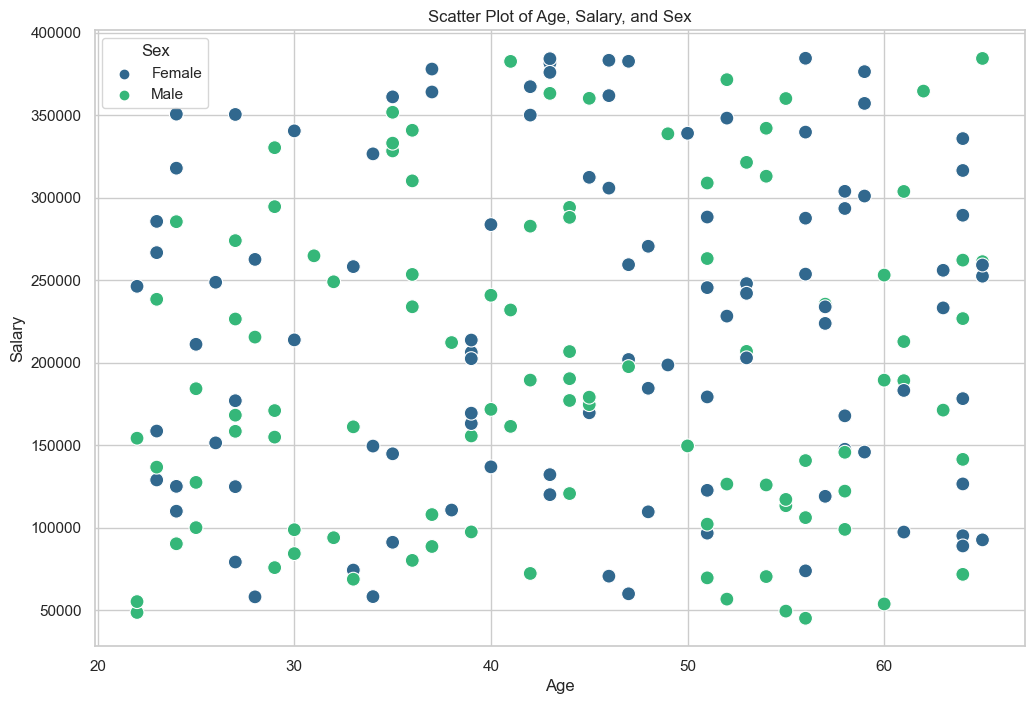

In [119]:

# Execute the SQL query to select age, salary, and sex data
cursor.execute("SELECT Age, Salary, Sex FROM data")
results = cursor.fetchall()

# Convert the query results into a DataFrame
df = pd.DataFrame(results, columns=['Age', 'Salary', 'Sex'])

# Close the database connection
#conn.close()

# Create a Seaborn scatter plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Specify the data and mapping of variables to plot
sns.scatterplot(x='Age', y='Salary', hue='Sex', data=df, palette='viridis', s=100)

# Customize plot labels and title
plt.title('Scatter Plot of Age, Salary, and Sex')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Sex')

# Show the plot
plt.show()


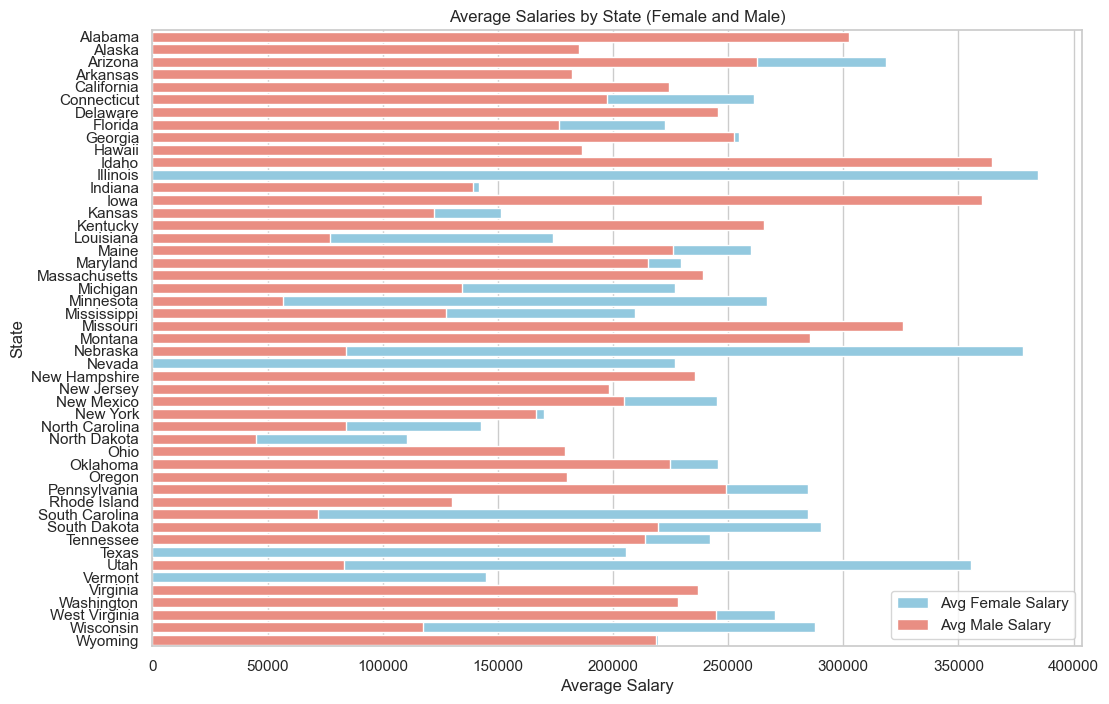

In [120]:
# Execute the SQL query to calculate average salary for females and males by state
cursor.execute("""
    SELECT State,
           AVG(CASE WHEN Sex = 'Female' THEN Salary END) AS AvgFemaleSalary,
           AVG(CASE WHEN Sex = 'Male' THEN Salary END) AS AvgMaleSalary
    FROM data
    GROUP BY State
    """)
results = cursor.fetchall()

# Convert the query results into a DataFrame
df = pd.DataFrame(results, columns=['State', 'AvgFemaleSalary', 'AvgMaleSalary'])

# Close the database connection
#conn.close()

# Create a Seaborn horizontal bar plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Sort the DataFrame by state name
df.sort_values(by='State', inplace=True)

# Create horizontal bar plots for average female and male salaries
sns.barplot(x='AvgFemaleSalary', y='State', data=df, color='skyblue', label='Avg Female Salary')
sns.barplot(x='AvgMaleSalary', y='State', data=df, color='salmon', label='Avg Male Salary')

# Customize plot labels and title
plt.title('Average Salaries by State (Female and Male)')
plt.xlabel('Average Salary')
plt.ylabel('State')
plt.legend()

# Show the plot
plt.show()


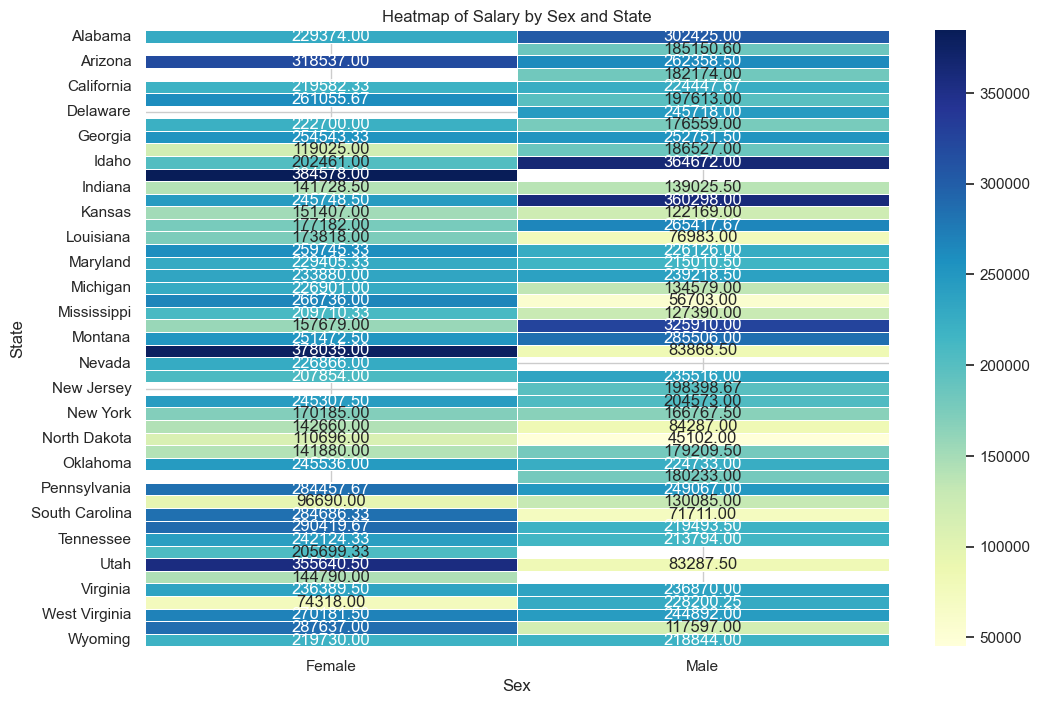

In [121]:

# Execute the SQL query to select Sex, State, and Salary data
cursor.execute("SELECT Sex, State, Salary FROM data")
results = cursor.fetchall()

# Convert the query results into a DataFrame
df = pd.DataFrame(results, columns=['Sex', 'State', 'Salary'])

# Close the database connection
#conn.close()

# Create a pivot table to prepare the data for the heatmap
pivot_table = df.pivot_table(index='State', columns='Sex', values='Salary', aggfunc='mean')

# Create a Seaborn heatmap
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# Customize plot labels and title
plt.title('Heatmap of Salary by Sex and State')
plt.xlabel('Sex')
plt.ylabel('State')

# Show the plot
plt.show()


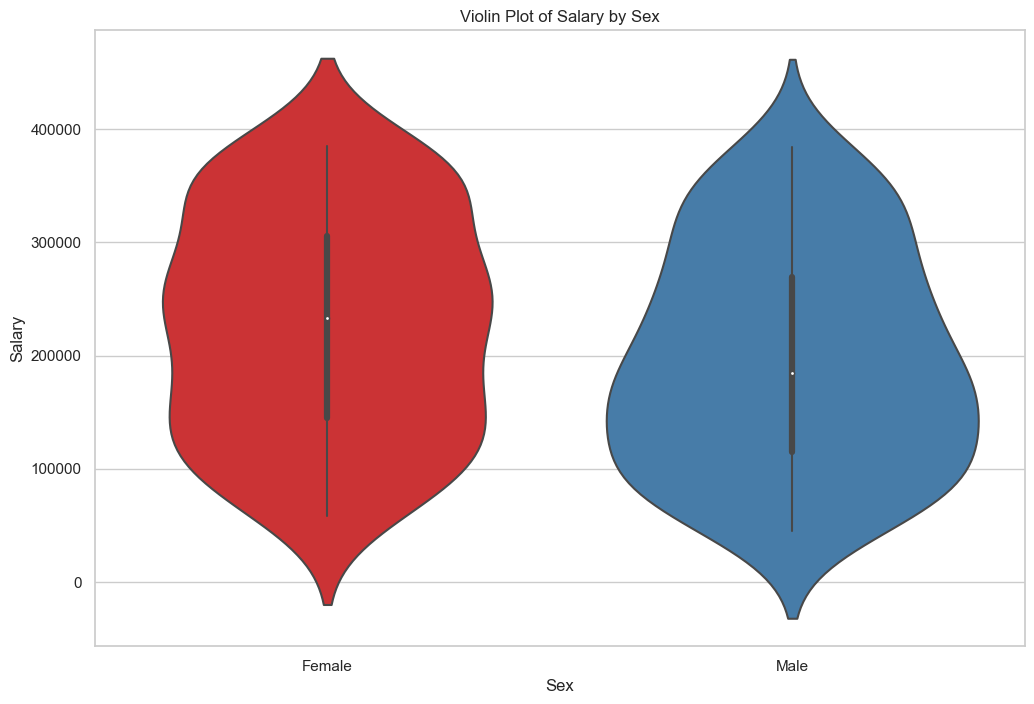

In [133]:
# Execute the SQL query to select the data for the violin plot
cursor.execute("SELECT Sex, Salary FROM data")
results = cursor.fetchall()

# Convert the query results into a DataFrame
df = pd.DataFrame(results, columns=['Sex', 'Salary'])

# Close the database connection
#conn.close()

# Create a Seaborn violin plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.violinplot(x='Sex', y='Salary', data=df, palette='Set1')

# Customize plot labels and title
plt.title('Violin Plot of Salary by Sex')
plt.xlabel('Sex')
plt.ylabel('Salary')

# Show the plot
plt.show()
